# Clasificador Binario usando Keras

## Cargando dataset de IMBD

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=25000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 1

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

24999

### Decodificación de vuelta a inglés

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be pra

## Preparando la data

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=25000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Construir el modelo

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### Optimización

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Validación

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Entrenamiento

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 13s 216ms/step - loss: 0.5720 - accuracy: 0.7783 - val_loss: 0.4442 - val_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 2s 75ms/step - loss: 0.3631 - accuracy: 0.8940 - val_loss: 0.3360 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2621 - accuracy: 0.9197 - val_loss: 0.2948 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2014 - accuracy: 0.9395 - val_loss: 0.2837 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1592 - accuracy: 0.9540 - val_loss: 0.2699 - val_accuracy: 0.8911
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1292 - accuracy: 0.9622 - val_loss: 0.2770 - val_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 2s 75ms/step - loss: 0.1048 - accuracy: 0.9725 - val_loss: 0.3045 - val_accuracy: 0.8832
Epoch 8/20


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Gráficos de pérdida

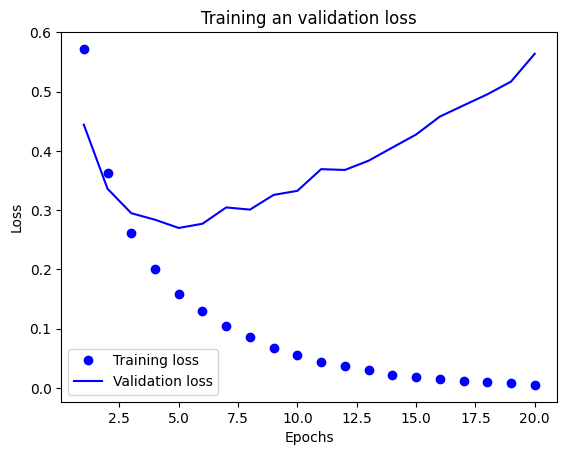

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training an validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

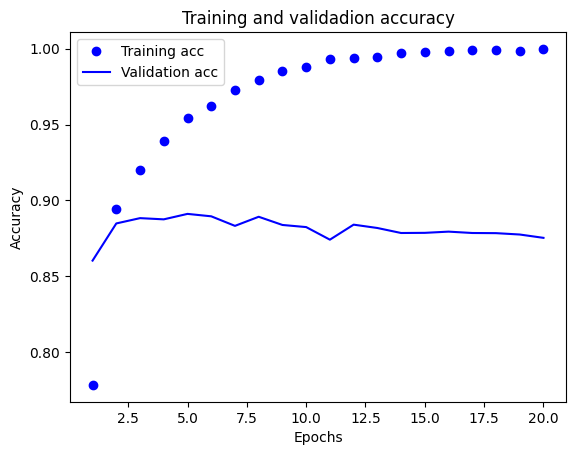

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validadion accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Entrenar de nuevo con 4 épocas para evitar overfitting

# Ejecución con GPU

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train, partial_y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_val, y_val)

Epoch 1/4
30/30 [==============================] - 8s 32ms/step - loss: 0.5250 - accuracy: 0.7731
Epoch 2/4
30/30 [==============================] - 1s 33ms/step - loss: 0.3091 - accuracy: 0.9011
Epoch 3/4
30/30 [==============================] - 1s 32ms/step - loss: 0.2143 - accuracy: 0.9322
Epoch 4/4
313/313 [==============================] - 2s 4ms/step - loss: 0.2798 - accuracy: 0.8907


In [13]:
results

[0.27978456020355225, 0.8906999826431274]

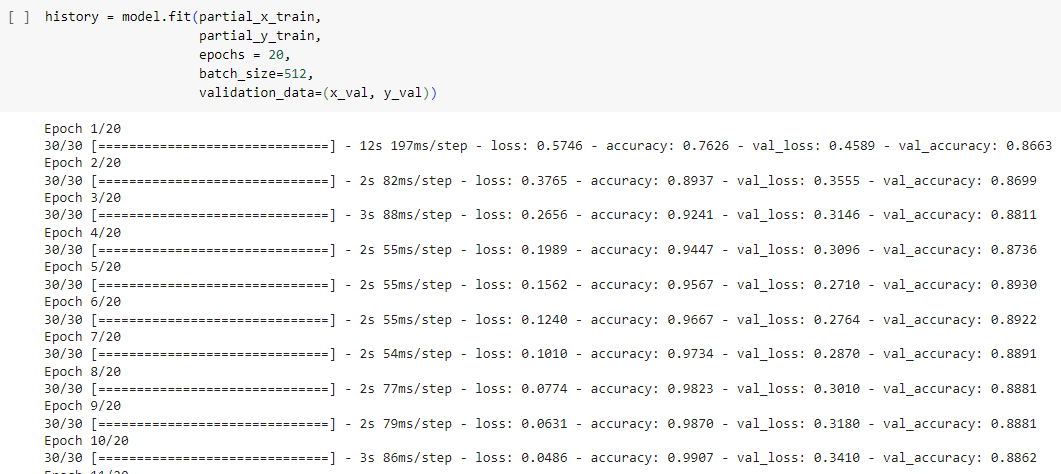

# Ejecución con CPU

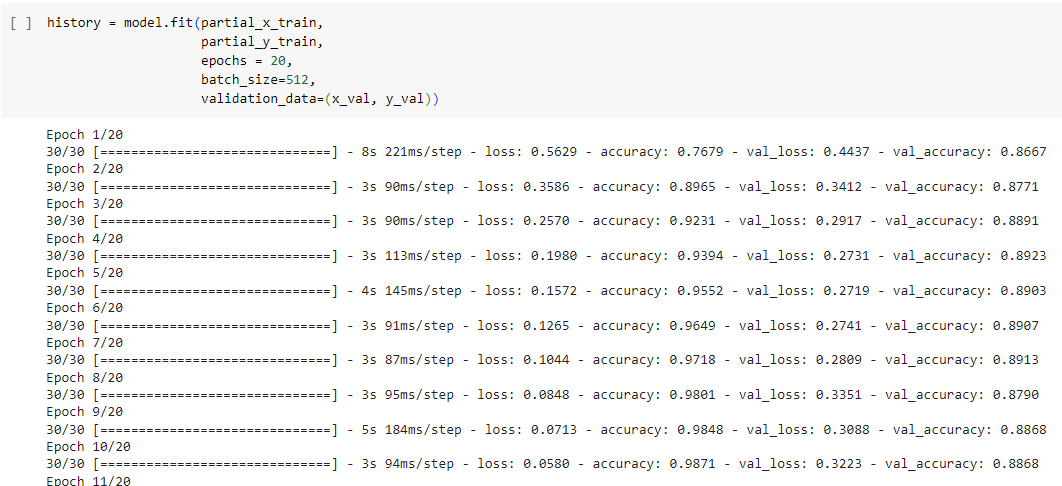